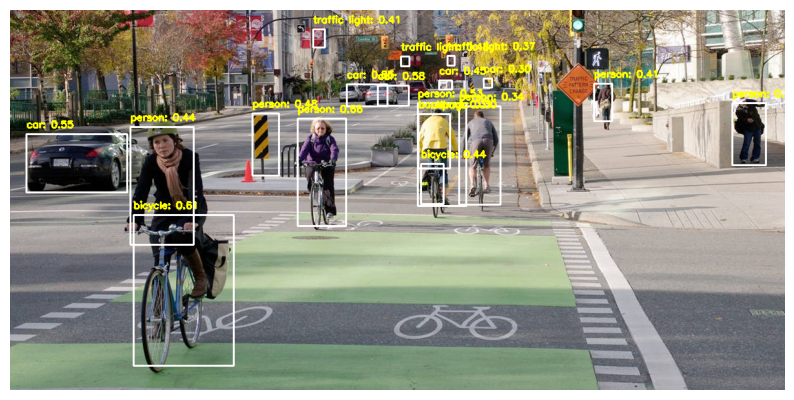

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load class labels
with open("coco_class_labels.txt") as f:
    labels = f.read().strip().split("\n")

# Load the pretrained model
modelFile  = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29", "frozen_inference_graph.pb")
configFile = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29.pbtxt")
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

# Object detection function
def detect_objects(net, image, threshold=0.3):
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True, crop=False)
    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > threshold:
            class_id = int(detections[0, 0, i, 1])
            x1 = int(detections[0, 0, i, 3] * w)
            y1 = int(detections[0, 0, i, 4] * h)
            x2 = int(detections[0, 0, i, 5] * w)
            y2 = int(detections[0, 0, i, 6] * h)

            label = labels[class_id]
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 255), 2)
            cv2.putText(image, f"{label}: {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

    return image

# Load an image and detect objects
img = cv2.imread("images/street.jpg")  # You can change this image
output = detect_objects(net, img)

# Convert to RGB and show using matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(output_rgb)
plt.axis("off")
plt.show()
